<a href="https://colab.research.google.com/github/PaolaDaft/ML_Morelos_Notebooks2024/blob/main/Clase10/M%C3%A9tricas_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

La clasificación es una técnica de aprendizaje supervisado que implica predecir la etiqueta de clase para los datos de entrada dados. Al evaluar el modelo, podemos medir la calidad de nuestro modelo y podemos ver qué tan bien puede funcionar nuestro modelo con respecto a nuestro caso de uso.

Las métricas más habituales son las siguientes:
* Exactitud
* Matriz de confusión
* Precisión
* Recall o Sensibilidad
* Puntuación F1
* Curva AUC-ROC

Empecemos 😊

In [2]:
# Importamos las librerias
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Carga del dataset
diabetes_data = load_breast_cancer()

# Separamos en X e y
X = diabetes_data.data
y = diabetes_data.target

# Training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

# Creamos un Random Forest y lo entrenamos!
classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train, y_train)

# Calculamos las predicciones!
predictions = classifier.predict(X_test)

Train Data: (455, 30), (455,)
Train Data: (114, 30), (114,)


Vamos a iniciar calculando el "Accuracy", recordar que este métrica no es la más adecuada a utilizar cuando tenemos dataset desbalanceados.

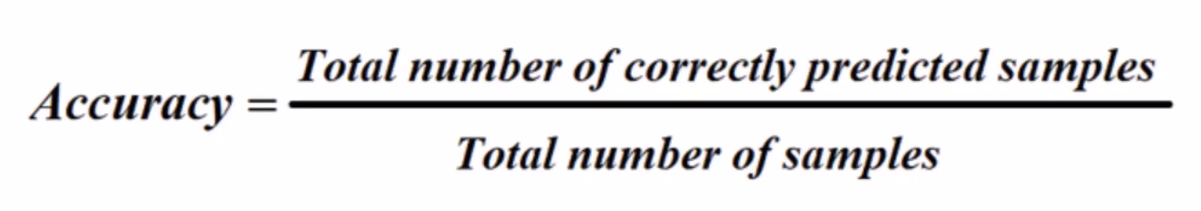

In [8]:
from sklearn.metrics import accuracy_score

# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

Accuracy of the classifier is: 0.9473684210526315


Ahora vamos a calcular la Matriz de Confusión

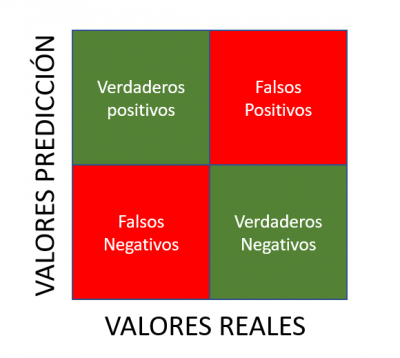

**Recordemos**

Hay cuatro términos importantes en una matriz de confusión:

* Verdaderos positivos (TP): estos son los casos en los que el "Sí" predicho en realidad pertenecía a la clase "Sí".
* Negativos verdaderos (TN): Estos son los casos en los que el “No” predicho en realidad pertenecía a la clase “No”.
* Falsos positivos (FP): estos son los casos en los que el "Sí" predicho en realidad pertenecía a la clase "No".
* Falsos negativos (FN): estos son los casos en los que el "No" predicho en realidad pertenecía a la clase "Sí".

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print(confusion_matrix(y_test, predictions))

#Ploteamos la Matriz
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

La precisión es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos positivos (FP).

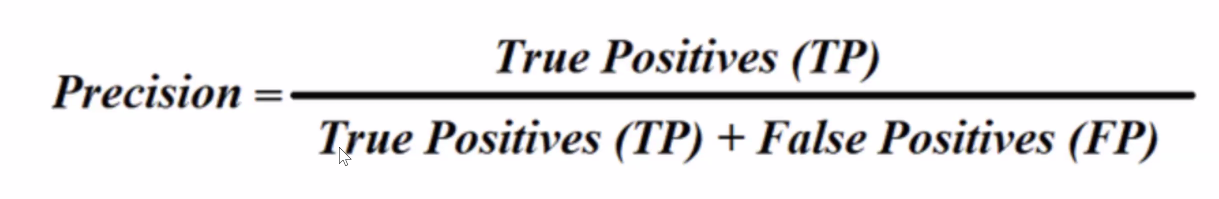

Para ilustrar esta métrica, tomemos un ejemplo de caso de uso de detección de spam. Si nuestro modelo detecta un correo como correo no deseado que en realidad no era un correo no deseado, el usuario podría perder un correo importante, es decir, aquí se deberían reducir los falsos positivos. Entonces, en este caso de uso, debemos usar la precisión como métrica para medir la calidad de nuestro clasificador.

In [4]:
from sklearn.metrics import precision_score

# Precision!
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

Precision Score of the classifier is: 0.971830985915493


El Recall es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos negativos (FN).

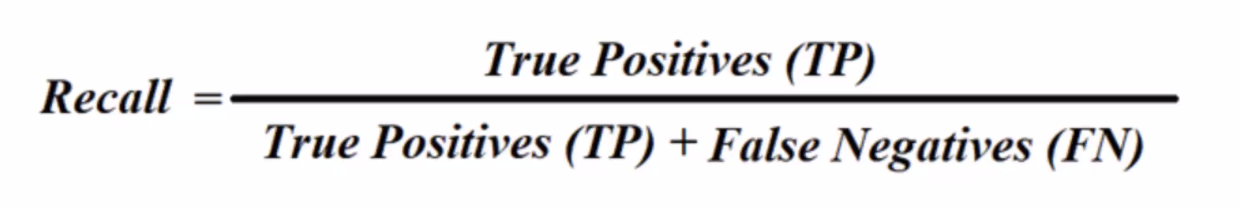

 Tomemos un ejemplo de caso de uso de predicción de cáncer. Considere una persona que en realidad tiene cáncer, pero nuestro clasificador predijo que no era un paciente con cáncer, lo que puede conducir a un maltrato de la persona, es decir, aquí se deben reducir los falsos negativos. Entonces, en este caso, debemos usar la recuperación como métrica para medir la calidad de nuestro clasificador.

In [6]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

Recall Score of the classifier is: 0.9452054794520548


La puntuación F1 es la media armónica de precisión y el recall. Se encuentra entre [0,1].

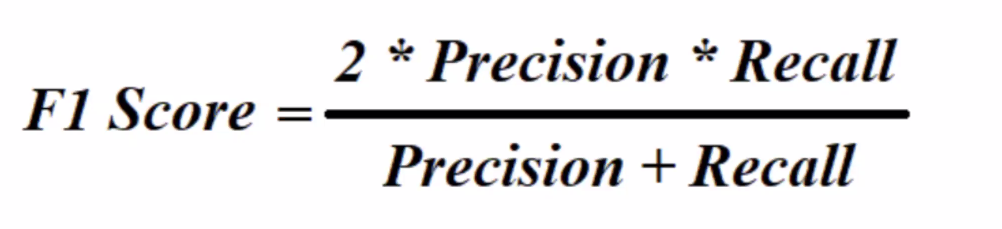!


In [5]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

F1 Score of the classifier is: 0.9583333333333334


**Curva ROC**

La curva AUC-ROC es una métrica de rendimiento que se utiliza para medir el rendimiento del modelo de clasificación en diferentes valores de umbral. Cuanto mayor sea el valor de AUC (Área bajo la curva), mejor será nuestro clasificador para predecir las clases. AUC-ROC se utiliza principalmente en problemas de clasificación binaria.

La curva ROC se traza entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR), es decir, TPR en el eje y y FPR en el eje y. AUC es el área bajo la curva ROC.

Un clasificador excelente tiene un valor AUC cercano a 1, mientras que un clasificador de bajo rendimiento tiene un valor AOC cercano a 0. Un clasificador con una puntuación AOC de 0.5 no tiene ninguna capacidad de separación de clases.

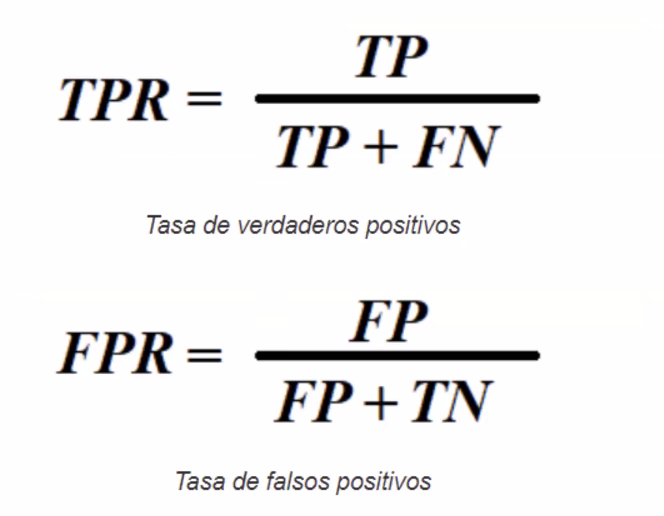

AUC for our classifier is: 0.9769462078182426


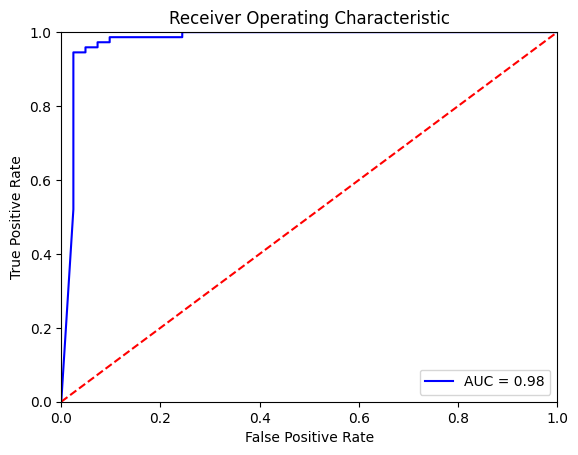

In [10]:
#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()